In [1]:
from ixbrlparse import IXBRL
import pandas as pd, requests, io, matplotlib.pyplot as plt

In [2]:
#!pip install ixbrlparse

In [3]:
codes = [2754, 4163]
years = [2019, 2020, 2021, 2022]
items = ['Revenue', 'GrossProfit', 'ProfitLossFromOperatingActivities', 'ProfitLoss']#, 'Inventories']

In [4]:
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
             AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'} 

In [5]:
data = {'code': [], 'date': []}
for item in items:
    data[item] = []

In [28]:
for code in codes:
    for year in years:
        data['code'].append(code)
        data['date'].append(year)
        url_add = f'https://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID={str(code)}&SYEAR={str(year)}&SSEASON=4&REPORT_ID=C'
        res = requests.get(url_add, headers = headers)
        res.encoding = 'big5'
        x = IXBRL(io.StringIO(res.text), raise_on_error=False)
        for item in items:
            
            for i in x.numeric:
                # some items may be duplicates using '_' in the context to make sure the correct one
                # point of time data have an instant attribute; period data have an enddate attribute
                i_year = i.context.instant.year if i.context.enddate is None else i.context.enddate.year
                if i.name == item and i_year == year  and str(i.context).find('_') == -1:
                                        
                    print(code, year, end='\r')
                    data[item].append(i.value/1000000)
print('All done!')

TypeError: 'method' object is not subscriptable

In [7]:
data = pd.DataFrame(data)
data = data.set_index(['code', 'date'])

In [8]:
data

Revenue  GrossProfit  ProfitLossFromOperatingActivities  \
code date                                                             
2754 2019  1926.252      803.342                            116.482   
     2020  2414.639      957.142                             50.738   
     2021  2527.098      992.090                             32.694   
     2022  3847.885     1608.777                            322.479   
4163 2019  2327.239      991.128                            447.099   
     2020  1961.112      826.213                            331.051   
     2021  1973.345      789.603                            221.937   
     2022  2413.462      972.909                            383.285   

           ProfitLoss  
code date              
2754 2019      88.716  
     2020      31.570  
     2021      22.349  
     2022     241.064  
4163 2019     363.754  
     2020     243.487  
     2021     223.356  
     2022     417.665

In [9]:
data[['R', 'GP', 'OI', 'NOS']] = data[['Revenue', 'GrossProfit', 'ProfitLossFromOperatingActivities', 'ProfitLoss']].div(data['Revenue'], axis=0)

In [10]:
data['other'] = 1 - data['GP'] - data['OI'] - data['NOS']

In [11]:
data

Revenue  GrossProfit  ProfitLossFromOperatingActivities  \
code date                                                             
2754 2019  1926.252      803.342                            116.482   
     2020  2414.639      957.142                             50.738   
     2021  2527.098      992.090                             32.694   
     2022  3847.885     1608.777                            322.479   
4163 2019  2327.239      991.128                            447.099   
     2020  1961.112      826.213                            331.051   
     2021  1973.345      789.603                            221.937   
     2022  2413.462      972.909                            383.285   

           ProfitLoss    R        GP        OI       NOS     other  
code date                                                           
2754 2019      88.716  1.0  0.417049  0.060471  0.046056  0.476424  
     2020      31.570  1.0  0.396391  0.021013  0.013074  0.569522  
     2021      22.349  1.0  0.392581  0.012937  0.008844  0.585638  
     2022     241.064  1.0  0.418094  0.083807  0.062648  0.435451  
4163 2019     363.754  1.0  0.425881  0.192116  0.156303  0.225700  
     2020     243.487  1.0  0.421298  0.168808  0.124158  0.285736  
     2021     223.356  1.0  0.400134  0.112467  0.113186  0.374212  
     2022     417.665  1.0  0.403118  0.158811  0.173056  0.265015

In [12]:
data.loc[2754, ['GP', 'OI', 'NOS', 'other']]

,GP,OI,NOS,other
date,,,,
2019,0.417049,0.060471,0.046056,0.476424
2020,0.396391,0.021013,0.013074,0.569522
2021,0.392581,0.012937,0.008844,0.585638
2022,0.418094,0.083807,0.062648,0.435451


https://medium.com/the-researchers-guide/introduction-to-stacked-bar-plot-matplotlib-pandas-and-seaborn-visualization-guide-part-2-2-716960c3006b

In [13]:
data.loc[2754].plot.bar(stacked = True,
            ax = ax,
            width = 0.3,
            edgecolor = "black")

NameError: name 'ax' is not defined

<Axes: xlabel='date'>

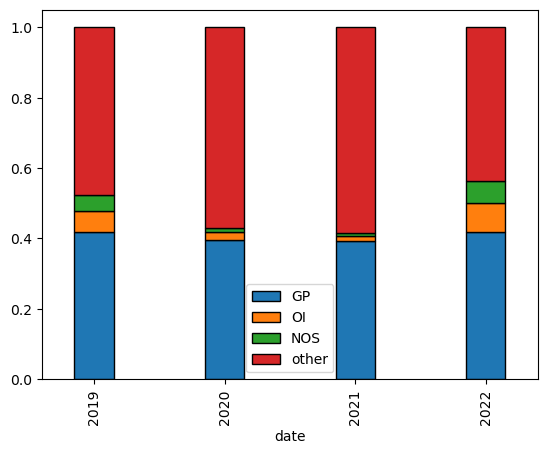

In [14]:
data.loc[2754, ['GP', 'OI', 'NOS', 'other']].plot.bar(stacked = True,
            width = 0.3,
            edgecolor = "black")

<Axes: xlabel='code,date'>

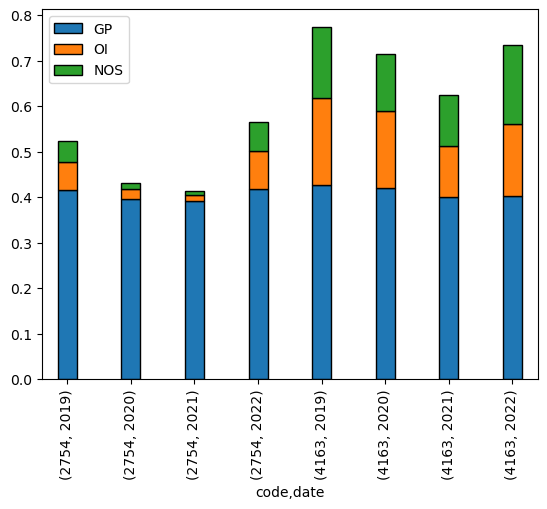

In [17]:
data.loc[slice(None), ['GP', 'OI', 'NOS']].plot.bar(stacked = True,
            width = 0.3,
            edgecolor = "black")

In [22]:
data = data.reset_index

In [27]:
data

<bound method DataFrame.reset_index of             Revenue  GrossProfit  ProfitLossFromOperatingActivities  \
code date                                                             
2754 2019  1926.252      803.342                            116.482   
     2020  2414.639      957.142                             50.738   
     2021  2527.098      992.090                             32.694   
     2022  3847.885     1608.777                            322.479   
4163 2019  2327.239      991.128                            447.099   
     2020  1961.112      826.213                            331.051   
     2021  1973.345      789.603                            221.937   
     2022  2413.462      972.909                            383.285   

           ProfitLoss    R        GP        OI       NOS     other  
code date                                                           
2754 2019      88.716  1.0  0.417049  0.060471  0.046056  0.476424  
     2020      31.570  1.0  0.396391  0.021